## Support Vector Machines

#### A Note about SVC

SVC and NuSVC implement the "one-against-one" approach for multi-class classification. If `n-class` is the number of classes, then `n_classes*(n_classes-1)/2` classifiers are constructed and each one trains data from two classes.

On the other hand, LinearSVC implements "one-vs-rest" multi-class strategy, thus training n_class models. If there are only 2 classes, only one model is trained.

<div class="alert alert-block alert-warning">SVMs are sensitive to scales of features. Try to use Scikit-Learn's `StandardScaler` for feature scaling</div>

[ -1.27505126 -10.70916256  -9.60788444 -11.19862434  -8.64253057
   1.10974451  -5.18154127  -1.49697509   1.96850231  -2.69129496
  -6.16117529  -9.26140935  -8.98768067 -12.41178591 -14.61887668
  -3.80754752   3.01918549   3.92383774 -10.66617405  -7.31296558
  -0.6386348   -2.21133017  -1.04863036   1.22317913 -13.65377074
  -3.0038712   -3.87287431  -9.40071605  -2.05280863 -10.97756534
 -12.14383182  -5.23495302  -0.69901488  -2.27343367  -3.34970951
  -3.85851255  -2.51680176  -4.05046645  -9.3631534  -11.42852391
  -9.48559388  -1.52447592   1.2255304   -8.35633708 -11.09804427
  -8.43445443   3.65180706  -9.08383306  -6.37649846 -11.9817152 ]
[[-1.27505126  6.38153982]]


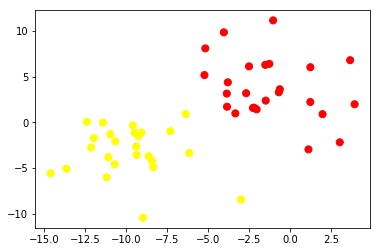

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=1, cluster_std=3.20)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
print(X[:,0])
print(X[:1])

In [53]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
print(model.support_vectors_),print('\n'),
print(model.support_),print('\n'),
print(model.coef_),print('\n'), 
print(model.n_support_),print('\n'), 
print(X[31]);
#these are the coordinates of points of support vectors

[[-5.23495302  5.1566201 ]
 [-3.85851255  1.70183182]
 [-6.37649846  0.91006527]]


[31 35 48]


[[-0.70574427 -0.28117952]]


[2 1]


[-5.23495302  5.1566201 ]


In [55]:
import numpy as np
test_x1 = np.array([2.5,10])
test_x2 = np.array([-5,-10])
predict_y1 = model.predict(test_x1[np.newaxis,:])
predict_y2 = model.predict(test_x2[np.newaxis,:])
print(test_x1)
print(test_x1[np.newaxis,:])
print(predict_y1, predict_y2)


[  2.5  10. ]
[[  2.5  10. ]]
[0] [1]


In [56]:
a = np.array([[2.5,10],[-5,-10]])
a

array([[  2.5,  10. ],
       [ -5. , -10. ]])

In [57]:
b = np.array([predict_y1,predict_y2])
b.ravel()

array([0, 1])

In [58]:
a[:,0]

array([ 2.5, -5. ])

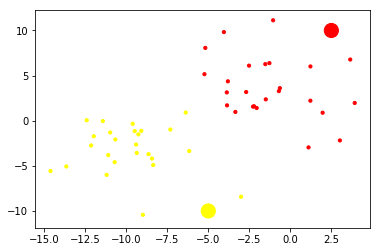

In [59]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='autumn');
plt.scatter(a[:, 0], a[:, 1], c=b.ravel(), s=200, cmap='autumn');

#big circles represent test data which have been correctly classified. 

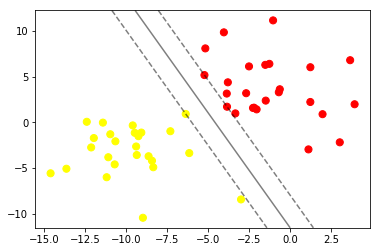

In [60]:
# function to visualize SVM. This is really handy function.

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

#Using above function to visualize
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);    

#### Softening the Margin

In the example above, there is a very clear separation between 2 groups of data but that might not be the case everywhere. In some cases, data points from each group may overlap. To address this issue, we tune the parameter `c`. In above case, we set the value of `c` as 10,00,00,00,000. The higher the value, the softer the margin. 

From Scikit-Learn doc - 

*Support Vector Machines belong to the discriminant model family: they try to find a combination of samples to build
a plane maximizing the margin between the two classes. Regularization is set by the C parameter: a small value for C
means the margin is calculated using many or all of the observations around the separating line (more regularization);
a large value for C means the margin is calculated on observations close to the separating line (less regularization).*

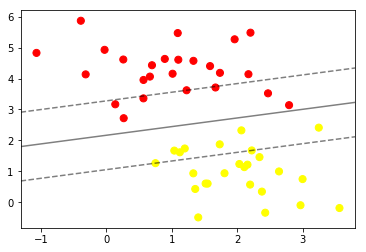

In [21]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=.80)

from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=.1)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);  

It is clear from above example that for `c` = .1, the SVM classifier didn't do the good job. On the other hand if we change the value of `c` to 100, the classification would have been clean.

array([ 1.61859642, -0.37982927])

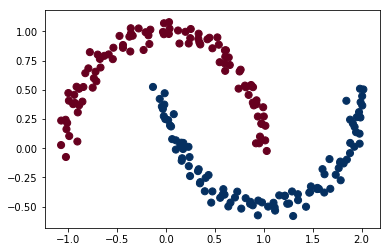

In [62]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'RdBu');


poly = PolynomialFeatures(3)
x = poly.fit_transform(X)
model = SVC()
model.fit(x,y);


#not sure if this example is working. Can't visualize it.

###  SVM with 'rbf' kernel

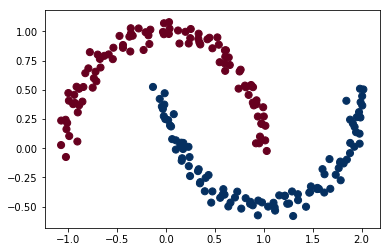

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'RdBu');

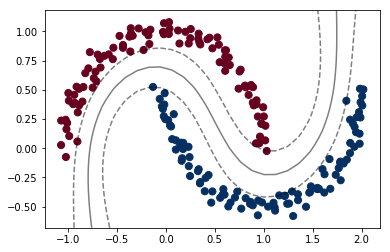

In [17]:
clf = SVC(kernel = 'rbf', C = 1E5)
clf.fit(X,y)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'RdBu');
plot_svc_decision_function(clf);  

### Kernel SVM

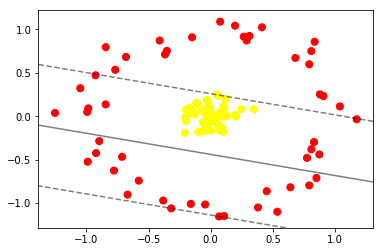

In [23]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

As is obvious in above case, even though data is classifiable, regular SVM doesn't work here.It is clear that no linear discrimination will ever be able to separate this data. But we can draw a lesson from the basis function regressions in In Depth: Linear Regression, and think about how we might project the data into a higher dimension such that a linear separator would be sufficient. For example, one simple projection we could use would be to compute a radial basis function centered on the middle clump:


<IPython.core.display.Javascript object>


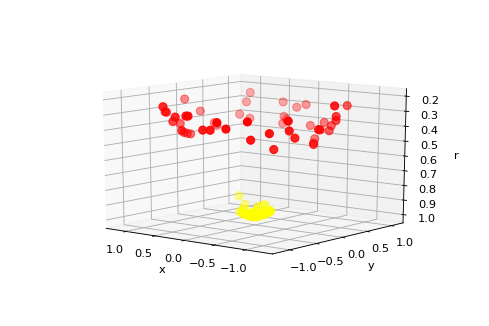

In [25]:
%matplotlib notebook
r = np.exp(-(X ** 2).sum(1))
%matplotlib notebook
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180), X=fixed(X), y=fixed(y));

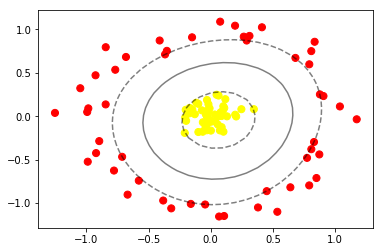

In [26]:
clf = SVC(kernel='rbf', C=1E6) #rbf = radial basis function
clf.fit(X, y)
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

### Face Recognition with SVM

This is a rather elaborate example. This also introduces uses of GridSearch, Pipeline, Classification Report.

In [27]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


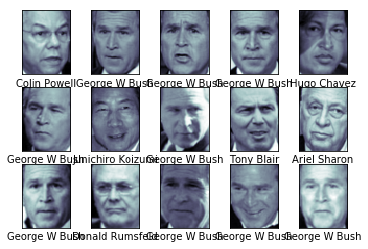

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [29]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(svd_solver='randomized',n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 57.4 s
{'svc__C': 10, 'svc__gamma': 0.001}


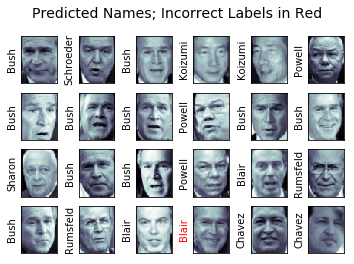

In [31]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [32]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

      avg / total       0.86      0.85      0.85       337



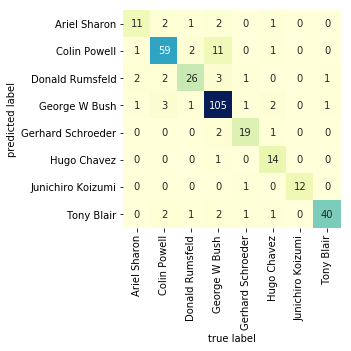

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap = 'YlGnBu',cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');